In [1]:
# Supress unnecessary warnings

import warnings
warnings.filterwarnings('ignore')# Supress unnecessary warnings

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Importing the NumPy and Pandas packages

import numpy as np
import pandas as pd

#import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

#import stats library
from scipy import stats
import statsmodels.api as sm

#import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn import metrics
from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix
from sklearn.preprocessing import LabelEncoder


# Importing the Dataset 

In [3]:
Leads_score =pd.read_csv("Downloads\\Leads.csv")

In [4]:
Leads_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
#Checking the Shape of dataset
Leads_score.shape

(9240, 37)

In [6]:
# Checking the summary of the dataset
Leads_score.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [7]:
# Checking the types of the feature variables and the null values present
Leads_score.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [10]:
#There are quite a few categorical variables present in this dataset for which we will need to create dummy variables.
#There are a lot of null values present as well, so we will need to treat them accordingly.

# Data Cleaning and preparing

In [8]:
# Checking the number of missing values in each column
Leads_score.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [12]:
#There are a lot of columns which have high number of missing values are not useful. 
# let's eliminate the columns having greater than 3000 missing values as they are of no use to us.

In [9]:
# Droping all the columns 
for c in Leads_score.columns:
    if Leads_score[c].isnull().sum()>3000:
        Leads_score.drop(c, axis=1,inplace=True)

In [14]:
Leads_score.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [10]:
# The variable City won't be of any use in our analysis. So it's best that we drop it.

Leads_score.drop(['City'], axis = 1, inplace = True)

In [11]:
# Same goes for the variable 'Country'

Leads_score.drop(['Country'], axis = 1, inplace = True)

In [12]:
# checking the percentage of missing values in each column

round(100*(Leads_score.isnull().sum()/len(Leads_score.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Specialization                                   15.56
How did you hear about X Education               23.89
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Magazine                                          0.00
Newspaper Article                                 0.00
X Educatio

In [13]:
# Checking the number of null values again
Leads_score.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article                                   0
X Education Forums          

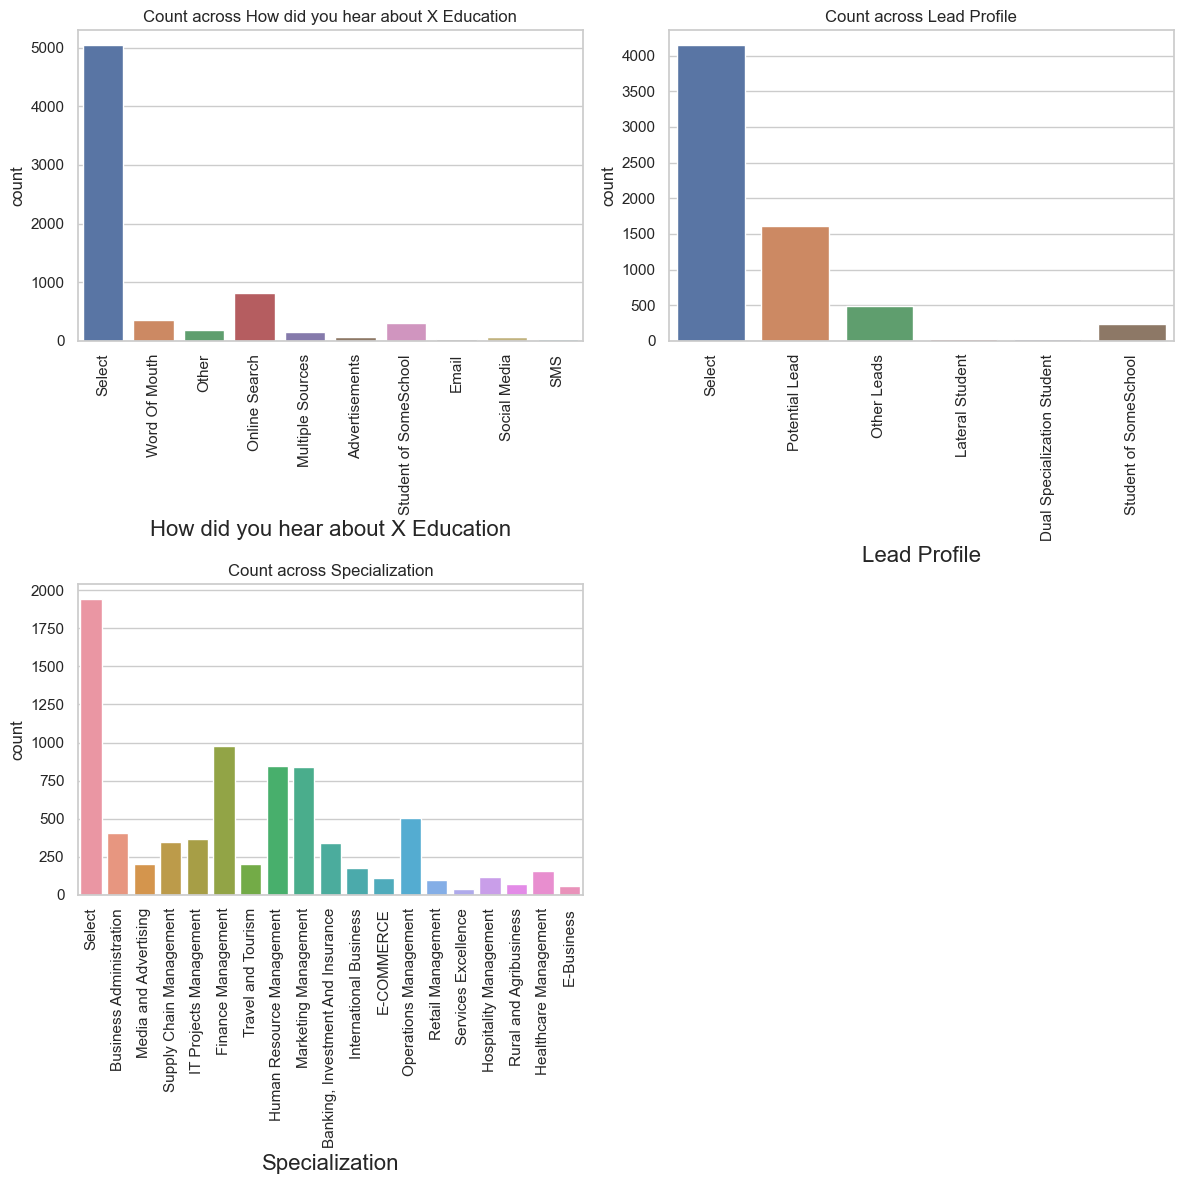

In [14]:
#Visualizing the features with Select values

def countplot(x, fig):
    plt.subplot(2,2, fig)
    sns.countplot(Leads_score[x])
    plt.title('Count across'+' '+ x, size = 12)
    plt.xlabel(x,size = 16)
    plt.xticks(rotation = 90)

plt.figure(figsize=(12,12))

countplot('How did you hear about X Education',1)
countplot('Lead Profile',2)
countplot('Specialization',3)



plt.tight_layout()

In [20]:
#'Select'  basically means that the student had not selected the option for that particular column
# These values are as good as missing values and hence we need to identify the value counts of the level 'Select' 

In [15]:
# checking the value counts of all the columns

for c in Leads_score:
    print(Leads_score[c].astype('category').value_counts())
    print('__ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __')

000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: Prospect ID, Length: 9240, dtype: int64
__ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: Lead Number, Length: 9240, dtype: int64
__ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __ __
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: in

In [16]:
Leads_score['Lead Profile'].astype('category').value_counts()

Select                         4146
Potential Lead                 1613
Other Leads                     487
Student of SomeSchool           241
Lateral Student                  24
Dual Specialization Student      20
Name: Lead Profile, dtype: int64

In [17]:
Leads_score['How did you hear about X Education'].value_counts()

Select                   5043
Online Search             808
Word Of Mouth             348
Student of SomeSchool     310
Other                     186
Multiple Sources          152
Advertisements             70
Social Media               67
Email                      26
SMS                        23
Name: How did you hear about X Education, dtype: int64

In [18]:
Leads_score['Specialization'].value_counts()

Select                               1942
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

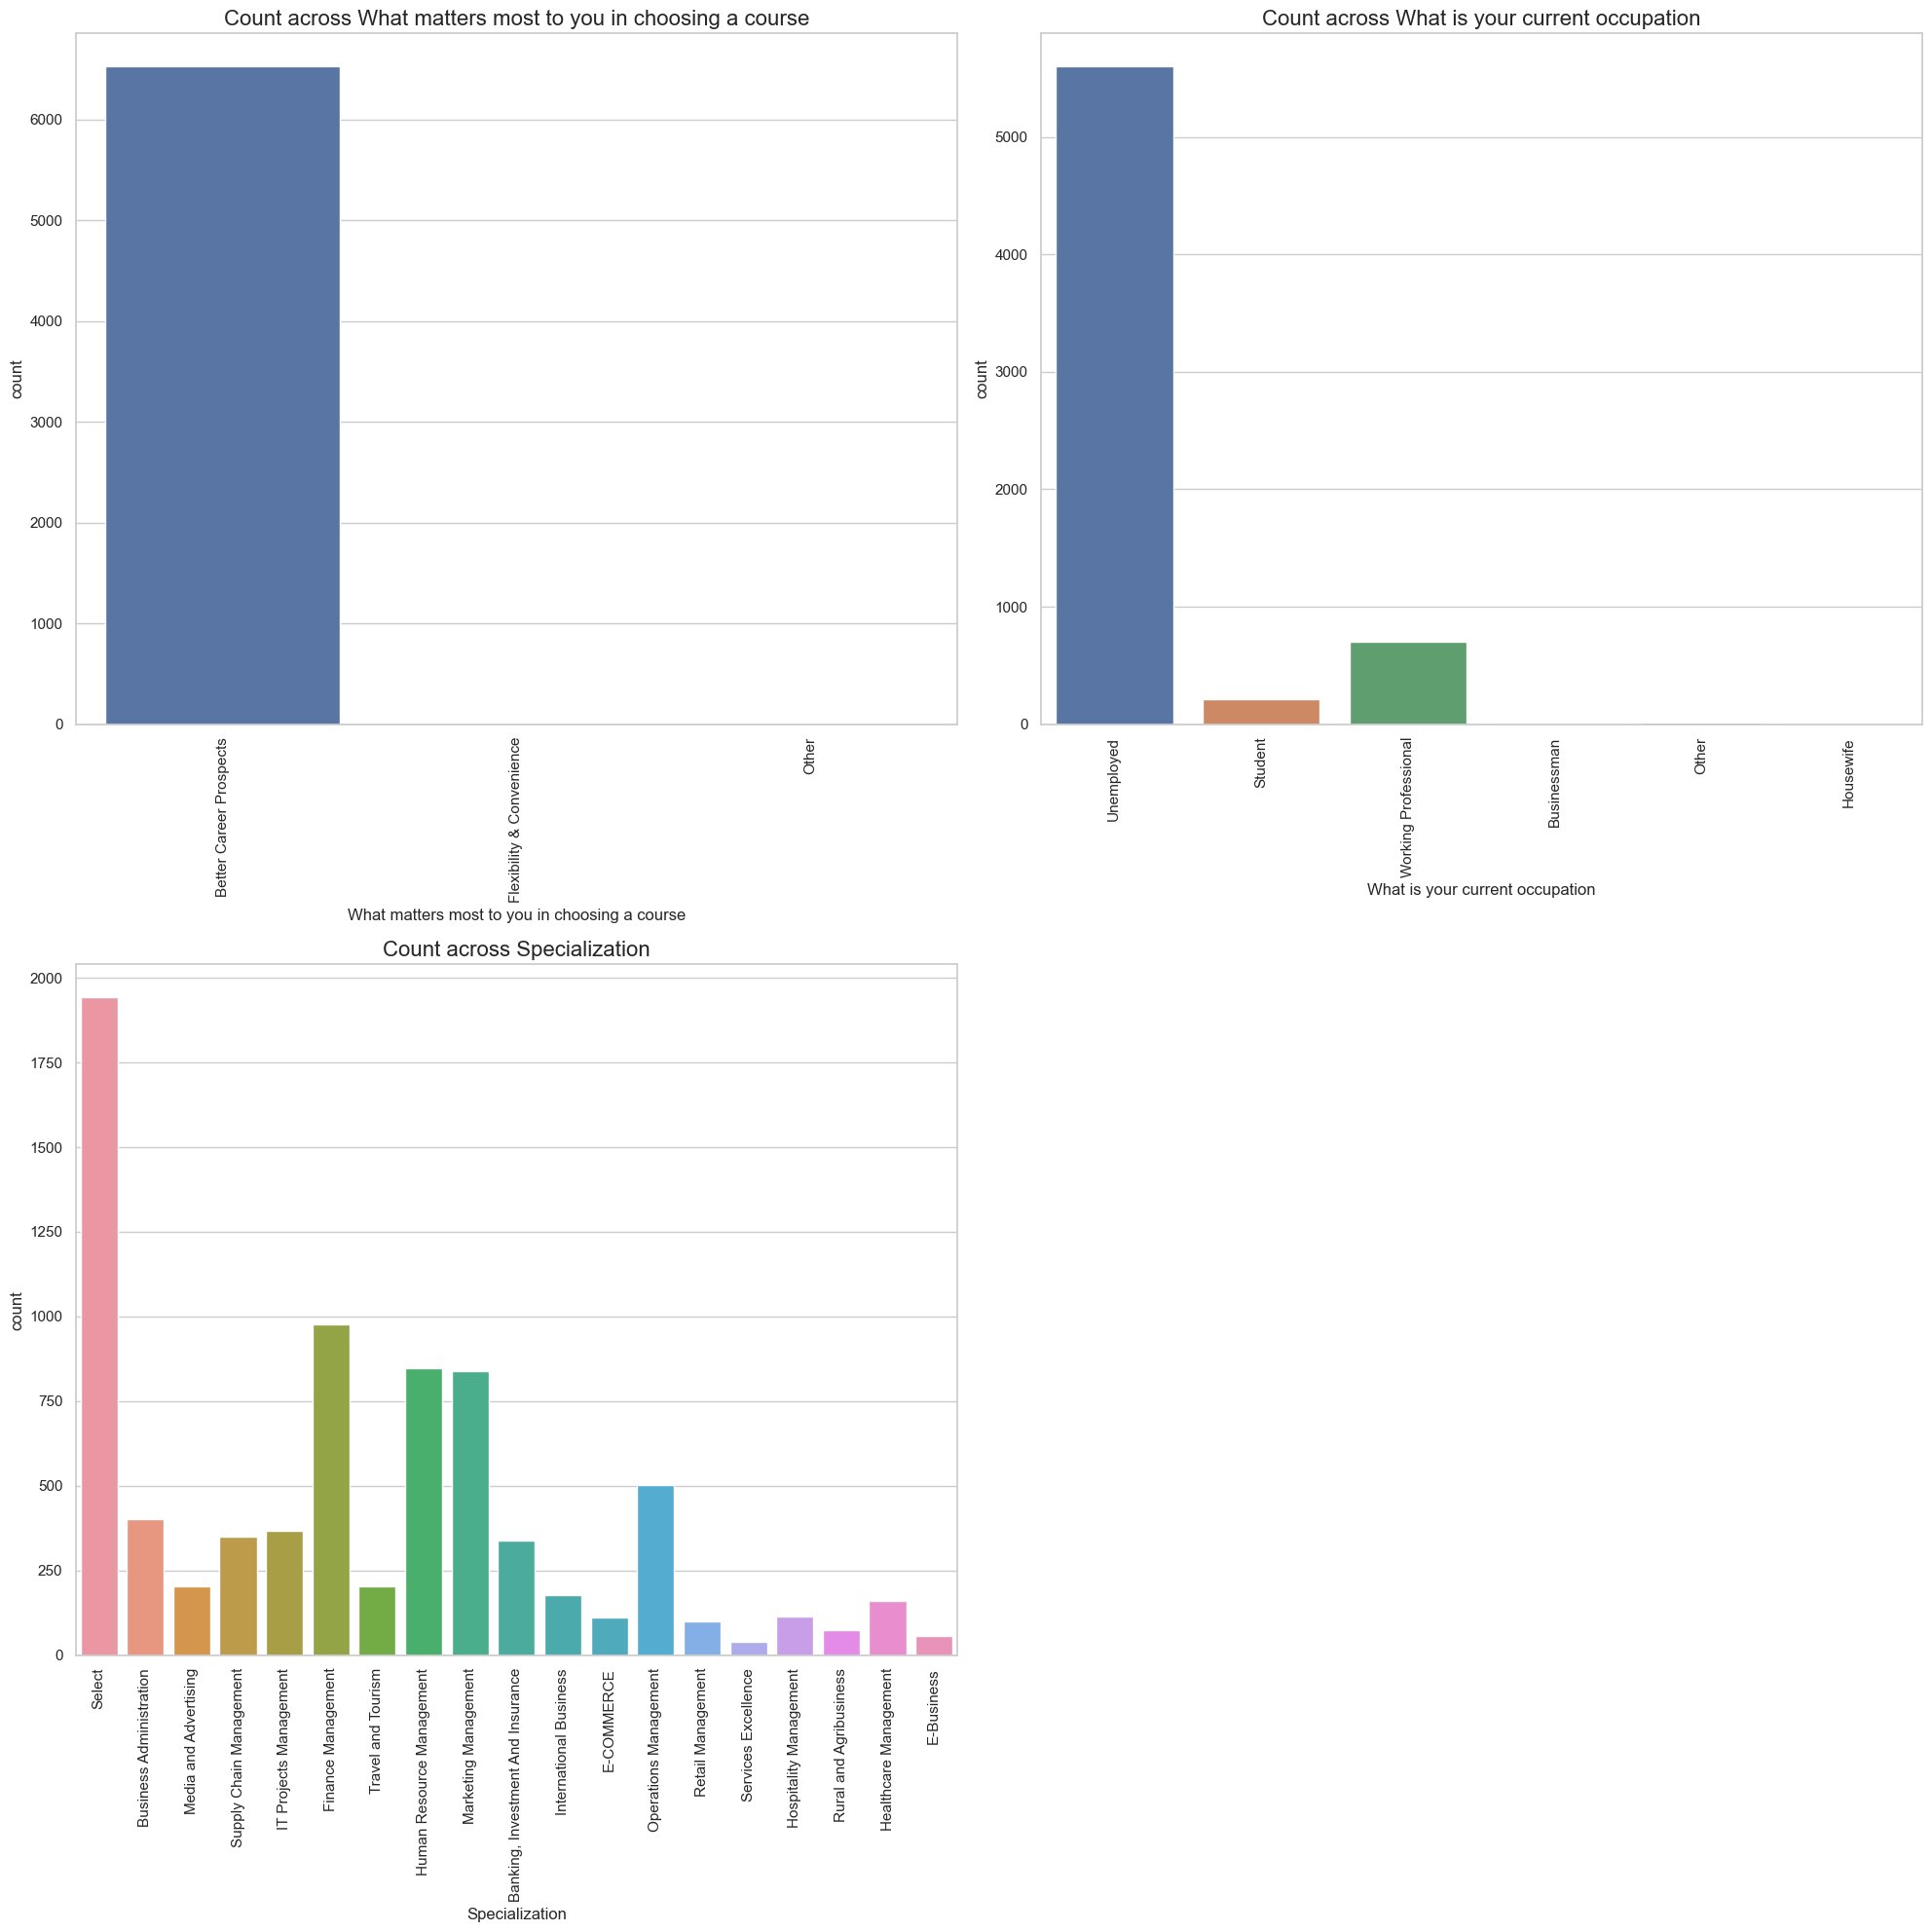

In [19]:
#Visualizing the features

def countplot(x, fig):
    plt.subplot(2,2, fig)
    sns.countplot(Leads_score[x])
    plt.title('Count across'+' '+ x, size = 16)
    plt.xlabel(x,size = 12)
    plt.xticks(rotation = 90)

plt.figure(figsize=(20,20))


countplot('What matters most to you in choosing a course',1)
countplot('What is your current occupation',2)
countplot('Specialization',3)

plt.tight_layout()

In [26]:
#"Lead Profile" and "How did you hear about X Education" have a lot of rows which select is of no use,So it's best that we drop them.

In [20]:
# dropping Lead Profile and How did you hear about X Education cols
Leads_score.drop(['Lead Profile', 'How did you hear about X Education'], axis = 1, inplace = True)

In [21]:
#when we got the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points.
#These include Do Not Call, Search, Magazine, Newspaper Article, X Education Forums, Newspaper, Digital Advertisement, Through Recommendations, Receive More Updates About Our Courses, Update me on Supply Chain Content, Get updates on DM Content, I agree to pay the amount through cheque. 
#Since practically all of the values for these variables are No, it's best that we drop these columns as they won't help with our analysis.

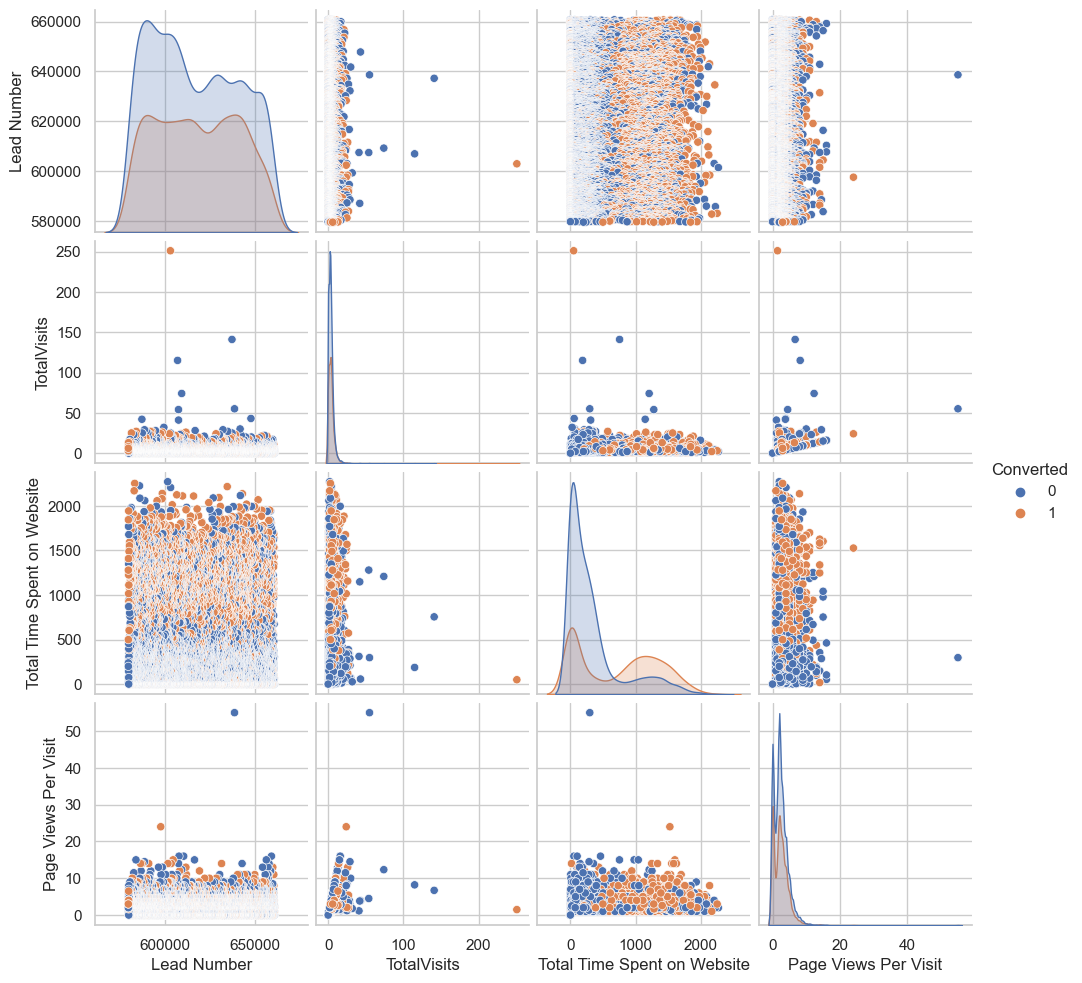

In [22]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(Leads_score,diag_kind='kde',hue='Converted')
plt.show()

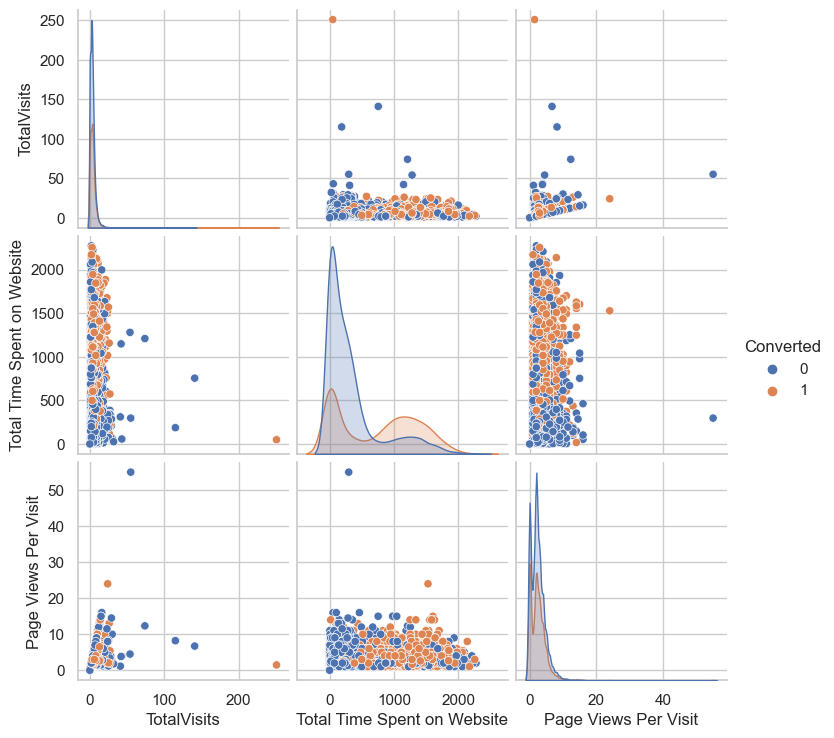

In [30]:
ls_edu = Leads_score[['TotalVisits','Total Time Spent on Website','Page Views Per Visit','Converted']]
sns.pairplot(ls_edu,diag_kind='kde',hue='Converted')
plt.show()

In [23]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
ts_edu = pd.DataFrame(pt.fit_transform(ls_edu))
ts_edu.columns = ls_edu.columns
ts_edu.head()

NameError: name 'ls_edu' is not defined

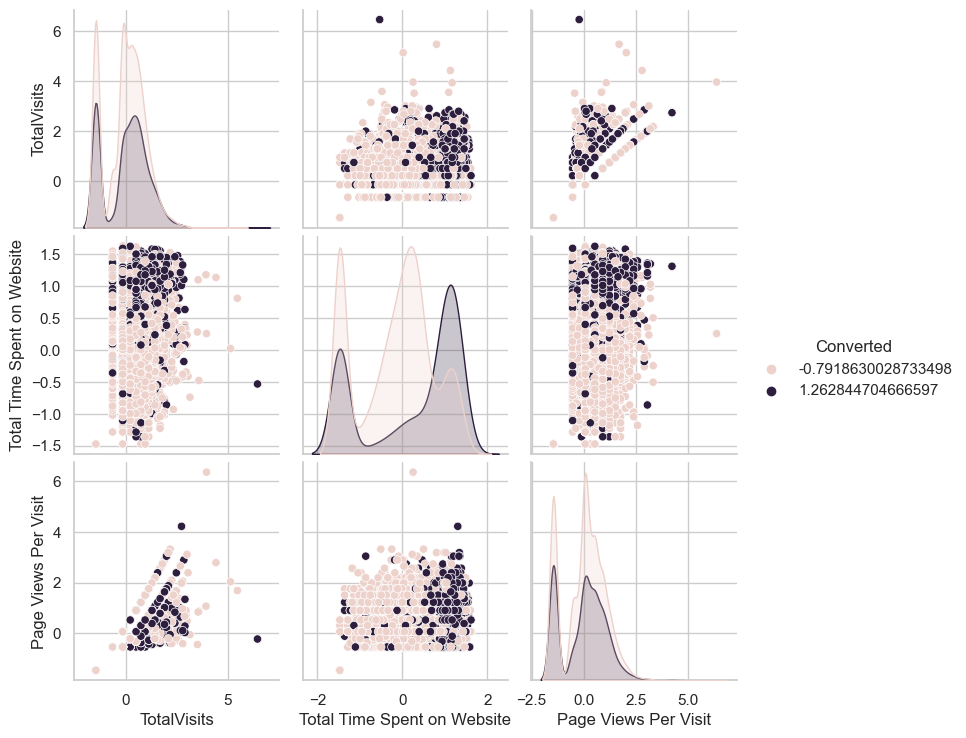

In [32]:
sns.pairplot(ts_edu,diag_kind='kde',hue='Converted')
plt.show()

In [24]:
# Dropping the above columns
Leads_score.drop(['Do Not Call', 'Search', 'Magazine', 'Newspaper Article', 'X Education Forums', 'Newspaper', 
            'Digital Advertisement', 'Through Recommendations', 'Receive More Updates About Our Courses', 
            'Update me on Supply Chain Content', 'Get updates on DM Content', 
            'I agree to pay the amount through cheque'], axis = 1, inplace = True)

In [25]:
Leads_score['What matters most to you in choosing a course'].value_counts()

Better Career Prospects      6528
Flexibility & Convenience       2
Other                           1
Name: What matters most to you in choosing a course, dtype: int64

In [25]:
# What matters most to you in choosing a course has the level "Better Career Prospects" 6528 times 

In [26]:
#so we should dropping this column as well.

Leads_score.drop(['What matters most to you in choosing a course'], axis = 1, inplace=True)

In [27]:
# Checking the number of null values again
Leads_score.isnull().sum()

Prospect ID                                  0
Lead Number                                  0
Lead Origin                                  0
Lead Source                                 36
Do Not Email                                 0
Converted                                    0
TotalVisits                                137
Total Time Spent on Website                  0
Page Views Per Visit                       137
Last Activity                              103
Specialization                            1438
What is your current occupation           2690
A free copy of Mastering The Interview       0
Last Notable Activity                        0
dtype: int64

In [38]:
#What is your current occupation which has a lot of null values.
#Now you can drop the entire row but since we have already lost so many feature variables, we choose not to drop it as it might turn out to be significant in the analysis. 
#So let's just drop the null rows for the column What is you current occupation.

In [28]:
# Dropping the null values rows in the column 'What is your current occupation'

Leads_score = Leads_score[~pd.isnull(Leads_score['What is your current occupation'])]

In [29]:
# Observing Correlation
# figure size
plt.figure(figsize=(10,10))



<Figure size 1000x1000 with 0 Axes>

<Figure size 1000x1000 with 0 Axes>

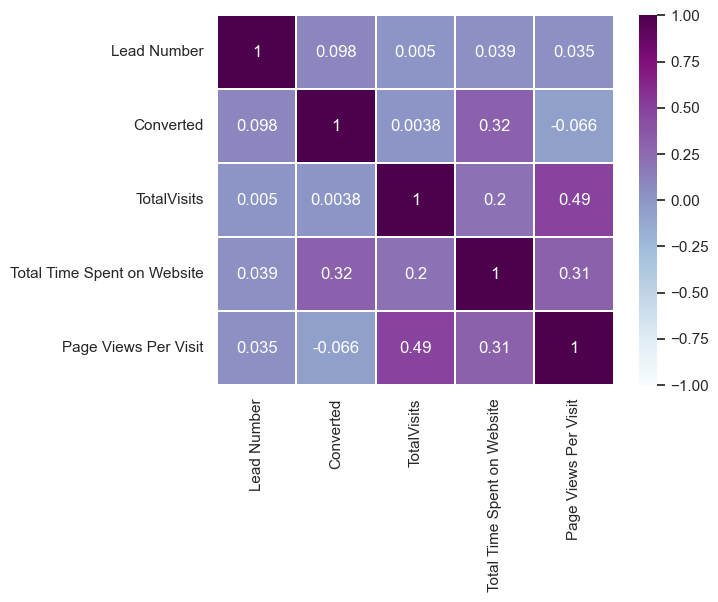

In [30]:
# heatmap
sns.heatmap(Leads_score.corr(), annot=True,cmap="BuPu", robust=True,linewidth=0.1, vmin=-1 )
plt.show()

In [31]:
#Analysing Categorical features

#cf = Leads_score.select_dtypes(include ="object").columns
#for i in cf:
    
 #   plt.figure(figsize =(15,5))
  #  sns.countplot(Leads_score[i], hue=Leads_score.Converted)
  #  plt.xticks(rotation = 90)
   # plt.title('Target variable in'+' '+ i)
   # plt.xlabel(i)
   # plt.show()


In [32]:
# Checking the number of null values again
Leads_score.isnull().sum()

Prospect ID                                 0
Lead Number                                 0
Lead Origin                                 0
Lead Source                                36
Do Not Email                                0
Converted                                   0
TotalVisits                               130
Total Time Spent on Website                 0
Page Views Per Visit                      130
Last Activity                             103
Specialization                             18
What is your current occupation             0
A free copy of Mastering The Interview      0
Last Notable Activity                       0
dtype: int64

In [44]:
#Since now the number of null values present in the columns are quite small
#we can simply drop the rows in which these null values are present.

In [33]:
# Dropping the null values rows in the column 'TotalVisits'

Leads_score = Leads_score[~pd.isnull(Leads_score['TotalVisits'])]

In [34]:
# Checking the number of null values again
Leads_score.isnull().sum().sort_values(ascending=False)

Lead Source                               29
Specialization                            18
Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [35]:
# Dropping the null values rows in the column 'Lead Source'

Leads_score = Leads_score[~pd.isnull(Leads_score['Lead Source'])]

In [36]:
# Checking the number of null values again
Leads_score.isnull().sum().sort_values(ascending=False)

Specialization                            18
Prospect ID                                0
Lead Number                                0
Lead Origin                                0
Lead Source                                0
Do Not Email                               0
Converted                                  0
TotalVisits                                0
Total Time Spent on Website                0
Page Views Per Visit                       0
Last Activity                              0
What is your current occupation            0
A free copy of Mastering The Interview     0
Last Notable Activity                      0
dtype: int64

In [37]:
# Drop the null values rows in the column 'Specialization'

Leads_score = Leads_score[~pd.isnull(Leads_score['Specialization'])]

In [38]:
# Checking the number of null values again
Leads_score.isnull().sum()

Prospect ID                               0
Lead Number                               0
Lead Origin                               0
Lead Source                               0
Do Not Email                              0
Converted                                 0
TotalVisits                               0
Total Time Spent on Website               0
Page Views Per Visit                      0
Last Activity                             0
Specialization                            0
What is your current occupation           0
A free copy of Mastering The Interview    0
Last Notable Activity                     0
dtype: int64

In [52]:
#Data doesn't have any null values. Let's now check the percentage of rows that we have retained.

In [39]:
print(len(Leads_score.index))
print(len(Leads_score.index)/9240)

6373
0.6897186147186147


In [40]:
#We still have around 69% of the rows which seems good enough.

# Let's look at the dataset again

Leads_score.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [41]:
# Dropping the "Prospect ID" and "Lead Number" as they are of no use
Leads_score.drop(['Prospect ID', 'Lead Number'], 1, inplace = True)

In [42]:
Leads_score.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Specialization,What is your current occupation,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,0,0.0,0,0.0,Page Visited on Website,Select,Unemployed,No,Modified
1,API,Organic Search,No,0,5.0,674,2.5,Email Opened,Select,Unemployed,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,1,2.0,1532,2.0,Email Opened,Business Administration,Student,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,0,1.0,305,1.0,Unreachable,Media and Advertising,Unemployed,No,Modified
4,Landing Page Submission,Google,No,1,2.0,1428,1.0,Converted to Lead,Select,Unemployed,No,Modified


In [43]:
####Dummy variable creation
#The next step is to dealing with the categorical variables 

# Checking the columns which are of type 'object'

dum = Leads_score.loc[:, Leads_score.dtypes == 'object']
dum.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [44]:
# Demo Cell
df = pd.DataFrame({'P': ['p', 'q', 'p']})
df

,P
0,p
1,q
2,p


In [45]:
pd.get_dummies(df)

,P_p,P_q
0,1,0
1,0,1
2,1,0


In [46]:
pd.get_dummies(df, prefix=['col1'])

,col1_p,col1_q
0,1,0
1,0,1
2,1,0


In [47]:
# Creating dummy variables 
dummy = pd.get_dummies(Leads_score[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                              'What is your current occupation','A free copy of Mastering The Interview', 
                              'Last Notable Activity']], drop_first=True)


In [48]:
Leads_score = pd.concat([Leads_score, dummy], axis=1)

In [49]:
# Creating dummy variable separately for the variable 'Specialization' since it has the level 'Select' 
# which is useless so we
# drop that level by specifying it explicitly

dummy_x = pd.get_dummies(Leads_score['Specialization'], prefix = 'Specialization')
dummy_x = dummy_x.drop(['Specialization_Select'], 1)
Leads_score = pd.concat([Leads_score, dummy_x], axis = 1)

In [50]:
# Dropping the variables for which the dummy variables have been created

Leads_score = Leads_score.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
                   'Specialization', 'What is your current occupation',
                   'A free copy of Mastering The Interview', 'Last Notable Activity'], 1)

In [51]:
Leads_score.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [52]:
######Test-Train Split######


# Importing the `train_test_split` library
# Put all the feature variables in X

T1 = Leads_score.drop(['Converted'], 1)
T1.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
T2 = Leads_score['Converted']

T2.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [54]:
# Spliting the dataset into 70% train and 30% test

T1_train, T1_test, T2_train, T2_test = train_test_split(T1, T2, train_size=0.7, test_size=0.3, random_state=100)

In [55]:
print("T1_train Size", T1_train.shape)
print("T2_train Size", T2_train.shape)

T1_train Size (4461, 74)
T2_train Size (4461,)


In [56]:
#########Scaling##########
#Now there are a few numeric variables present in the dataset which have different scales, scale these variables.

# Importing the 'MinMax scaler' Library
# Scaling the three numeric features present in the dataset

scaler = MinMaxScaler()

T1_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(T1_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

T1_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,Lead Source_Live Chat,...,Specialization_IT Projects Management,Specialization_International Business,Specialization_Marketing Management,Specialization_Media and Advertising,Specialization_Operations Management,Specialization_Retail Management,Specialization_Rural and Agribusiness,Specialization_Services Excellence,Specialization_Supply Chain Management,Specialization_Travel and Tourism
8003,0.015936,0.029489,0.125,1,0,0,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
218,0.015936,0.082306,0.250,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4171,0.023904,0.034331,0.375,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4037,0.000000,0.000000,0.000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3660,0.000000,0.000000,0.000,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


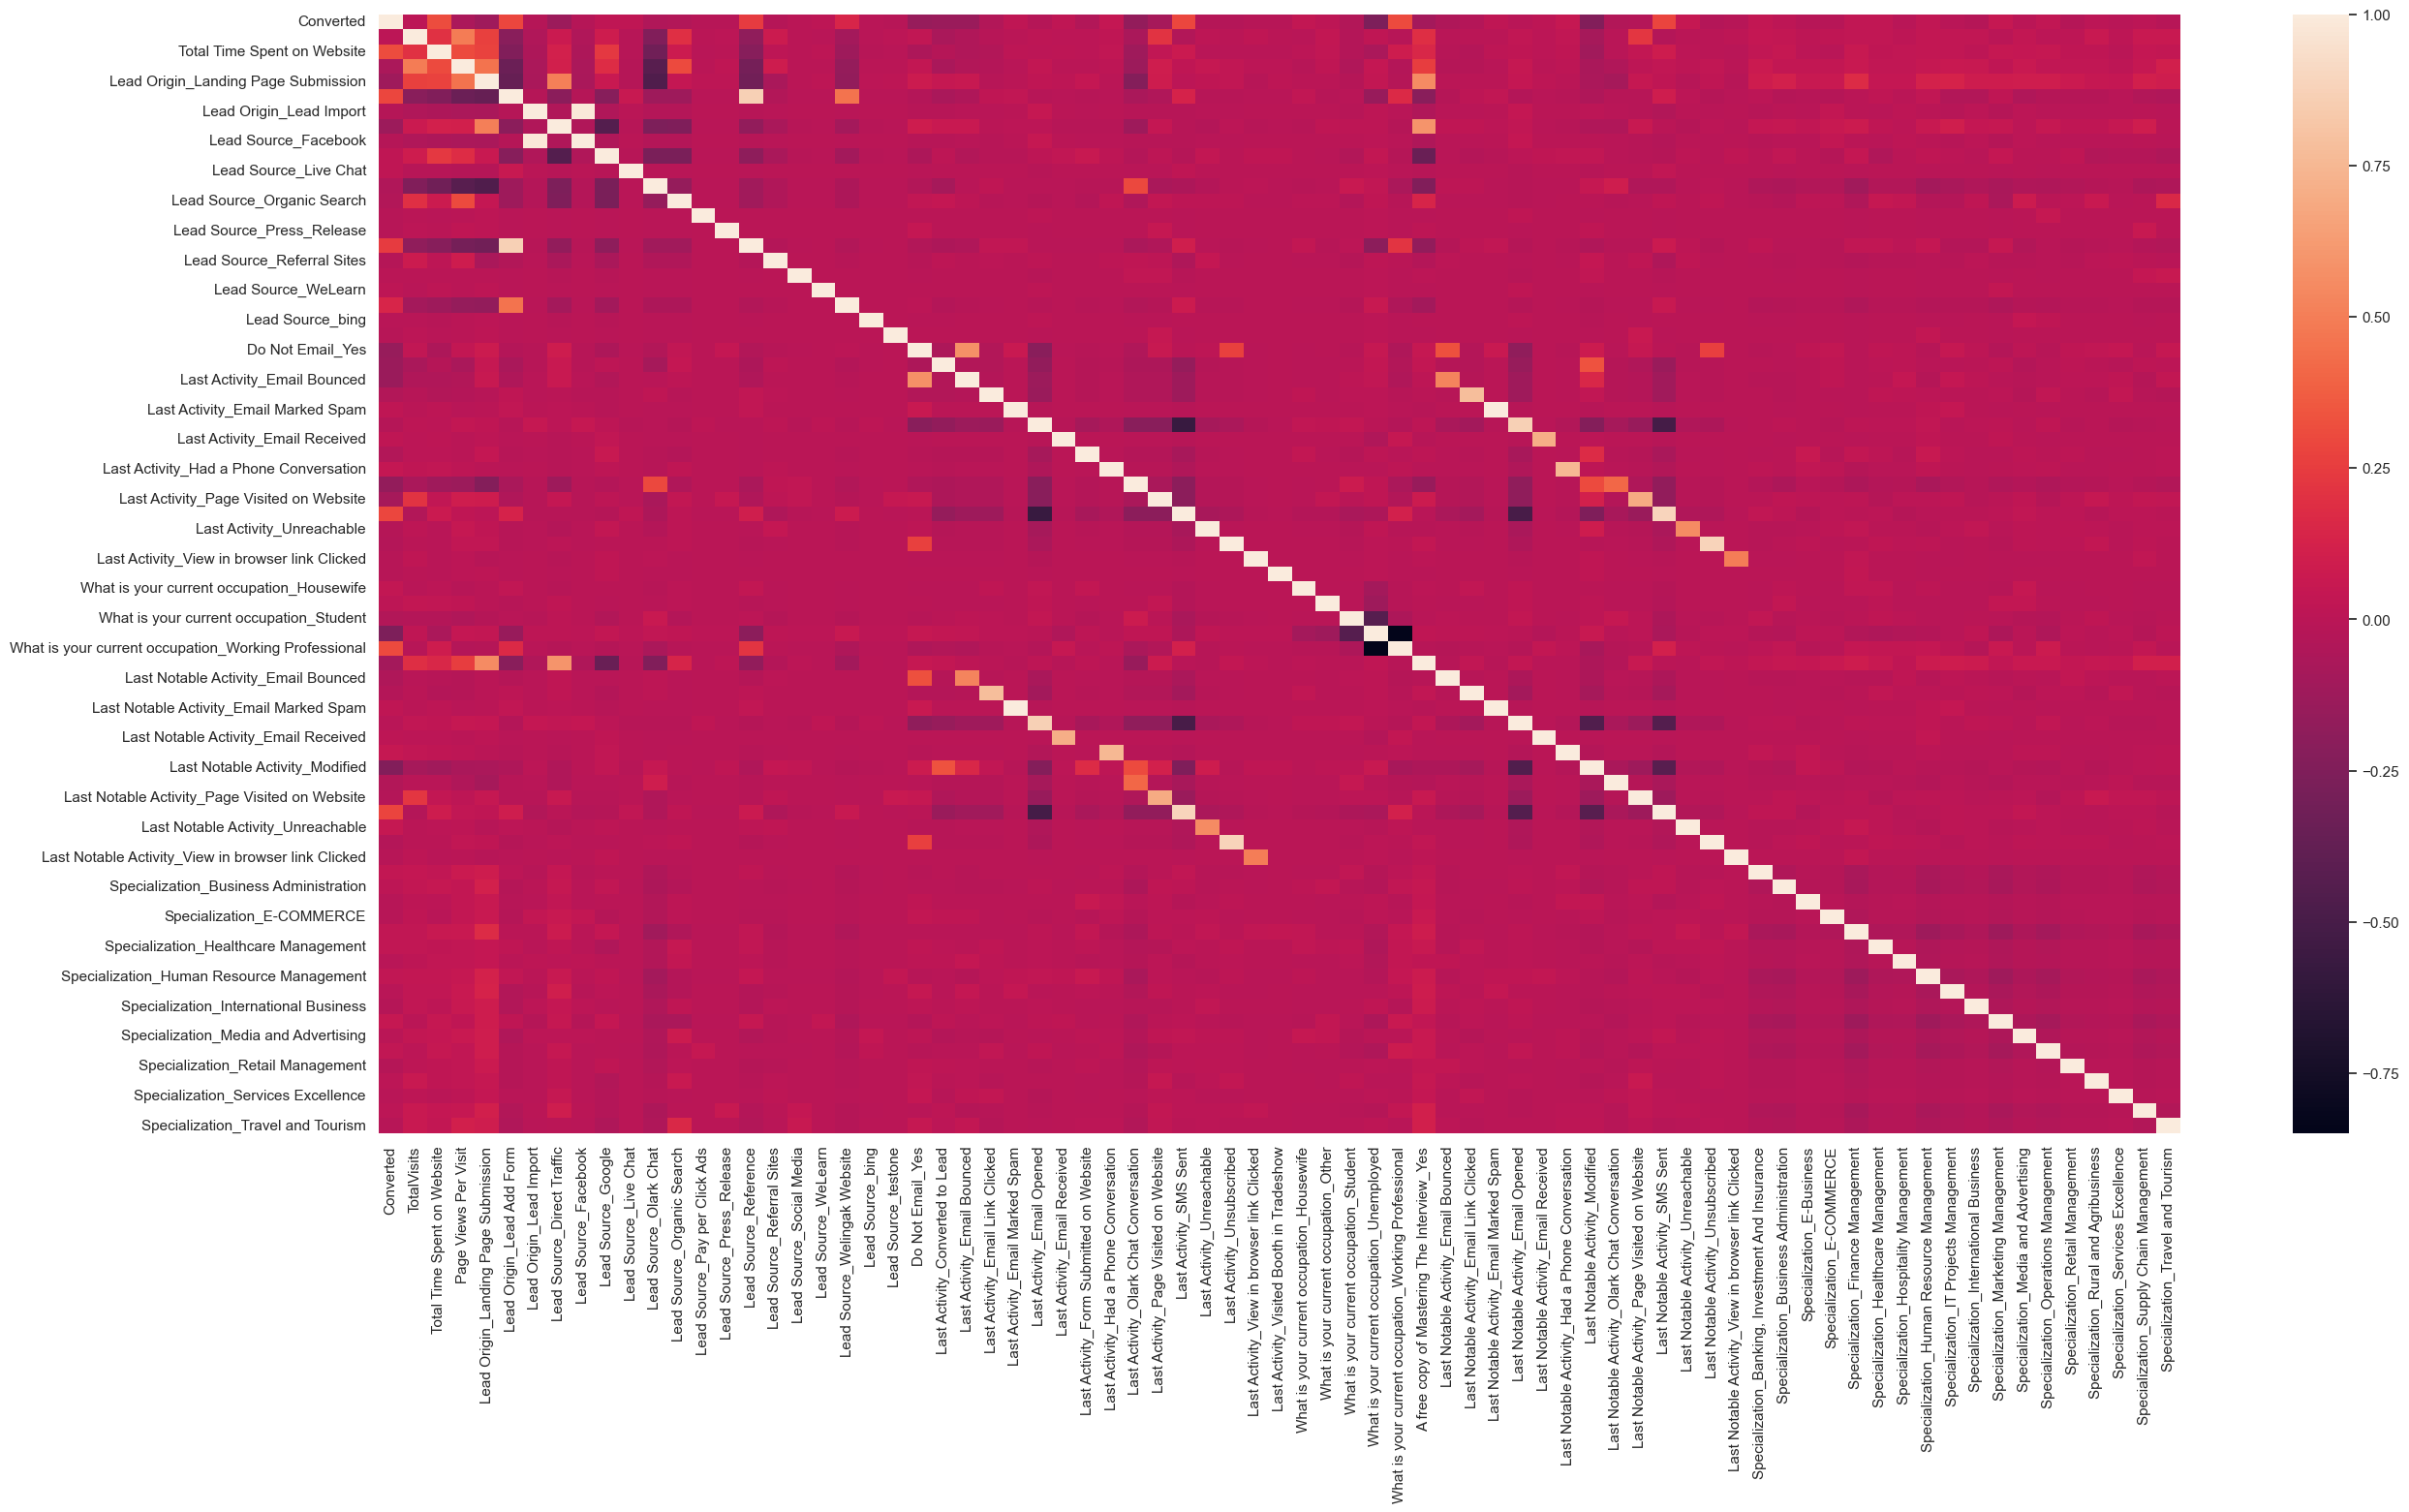

In [57]:
# Since the number of variables are pretty high, it's better that we look at the table instead of plotting a heatmap

# Looking at the correlation table
plt.figure(figsize = (30,15))
sns.heatmap(Leads_score.corr())
plt.show()

# Model Building

In [69]:
#The best way to approach this is to select a small set of features from this pool of variables using RFE.

# Importing the 'LogisticRegression' and creating a LogisticRegression object
logr = LogisticRegression()

In [70]:
# Importing the 'RFE' 

rfe = RFE(logr,step =15)             
rfe = rfe.fit(T1_train, T2_train)

In [71]:


list(zip(T1_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 3),
 ('Lead Origin_Landing Page Submission', False, 3),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Welingak Website', True, 1),
 ('Do Not Email_Yes', True, 1),
 ('Last Activity_Converted to Lead', False, 3),
 ('Last Activity_Email Bounced', True, 1),
 ('Last Activity_Had a Phone Conversation', True, 1),
 ('Last Activity_Olark Chat Conversation', True, 1),
 ('Last Activity_Page Visited on Website', False, 3),
 ('Last Activity_SMS Sent', True, 1),
 ('What is your current occupation_Housewife', True, 1),
 ('What is your current occupation_Student', True, 1),
 ('What is your current occupation_Unemployed', True, 1),
 ('What is your current occupation_Working Professional', True, 1),
 ('Last Notable Activity_Email Bounced', True, 1),
 ('Last Notable Activity_Email Link Clicked', False, 3),
 ('Last Notable Activity_Had a Phone Conversation'

In [72]:
# Putting all the columns selected by RFE in the variable 'col'

vcol = T1_train.columns[rfe.support_]

In [84]:
#we have all the variables selected by RFE
# For the p-values and the VIFs, let's use these variables to create a logistic regression model using statsmodels.

In [73]:
# Select only the columns selected by RFE

T1_train = T1_train[vcol]

In [74]:
# Importing 'statsmodels'


#########Model 1

# Fit a logistic Regression model on T1_train after adding a constant and output the summary

T1_train_sm = sm.add_constant(T1_train)
logm2 = sm.GLM(T2_train, T1_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4442
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2048.0
Date:                Sun, 18 Jun 2023   Deviance:                       4096.0
Time:                        17:03:51   Pearson chi2:                 4.81e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3730
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0055      0.600     -1.675      0.094      -2.182       0.171
TotalVisits                                             10.6516      2.665      3.997      0.000       5.428      15.875
Total Time Spent on Website                              4.4357      0.186     23.883      0.000       4.072       4.800
Lead Origin_Lead Add Form                                4.1642      0.259     16.101      0.000       3.657       4.671
Lead Source_Olark Chat                                   1.6312      0.127     12.869      0.000       1.383       1.880
Lead Source_Welingak Website                             2.1731      1.037      2.096      0.036       0.141       4.205
Do Not Email_Yes                                        -1.4144      0.223     -6.334      0.000      -1.852      -0.977
Last Activity_Email Bounced                             -1.5578      0.659     -2.363      0.018      -2.850      -0.266
Last Activity_Had a Phone Conversation                   0.9922      0.983      1.009      0.313      -0.934       2.919
Last Activity_Olark Chat Conversation                   -1.0179      0.183     -5.551      0.000      -1.377      -0.658
Last Activity_SMS Sent                                   1.0740      0.084     12.728      0.000       0.909       1.239
What is your current occupation_Housewife               22.6616   2.45e+04      0.001      0.999   -4.81e+04    4.81e+04
What is your current occupation_Student                 -1.0398      0.633     -1.642      0.101      -2.281       0.201
What is your current occupation_Unemployed              -1.2787      0.595     -2.148      0.032      -2.445      -0.112
What is your current occupation_Working Professional     1.3286      0.624      2.128      0.033       0.105       2.552
Last Notable Activity_Email Bounced                      2.1060      0.793      2.655      0.008       0.551       3.661
Last Notable Activity_Had a Phone Conversation          23.0345   2.11e+04      0.001      0.999   -4.13e+04    4.13e+04
Last Notable Activity_Unreachable                        2.7247      0.808      3.372      0.001       1.141       4.308
Specialization_Banking, Investment And Insurance         0.5120      0.201      2.550      0.011       0.118       0.906
========================================================================================================================
"""

In [87]:
#There are quite a few variable which have a p-value greater than 0.05.
#We will need to take care of them. But first, let's also look at the VIFs.

# Importing the 'variance_inflation_factor' library

In [75]:
####Checking VIF

vif = pd.DataFrame()
vif['Features'] = T1_train.columns
vif['VIF'] = [variance_inflation_factor(T1_train.values, i) for i in range(T1_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,What is your current occupation_Unemployed,3.81
7,Last Activity_Had a Phone Conversation,2.44
15,Last Notable Activity_Had a Phone Conversation,2.43
1,Total Time Spent on Website,2.38
6,Last Activity_Email Bounced,1.95
2,Lead Origin_Lead Add Form,1.71
9,Last Activity_SMS Sent,1.68
5,Do Not Email_Yes,1.65
0,TotalVisits,1.63
13,What is your current occupation_Working Profes...,1.57


In [76]:
# Drop the variable Lead Source_Reference since it has a high p-value as well as a high VIF.

T1_train.drop('Lead Source_Reference', axis = 1, inplace = True)

KeyError: "['Lead Source_Reference'] not found in axis"

In [78]:
#########Model 2#########

# Refit the model with the new set of features

logm1 = sm.GLM(T2_train,(sm.add_constant(T1_train)), family = sm.families.Binomial())
logm1.fit().summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4442
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2048.0
Date:                Sun, 18 Jun 2023   Deviance:                       4096.0
Time:                        17:04:06   Pearson chi2:                 4.81e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.3730
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0055      0.600     -1.675      0.094      -2.182       0.171
TotalVisits                                             10.6516      2.665      3.997      0.000       5.428      15.875
Total Time Spent on Website                              4.4357      0.186     23.883      0.000       4.072       4.800
Lead Origin_Lead Add Form                                4.1642      0.259     16.101      0.000       3.657       4.671
Lead Source_Olark Chat                                   1.6312      0.127     12.869      0.000       1.383       1.880
Lead Source_Welingak Website                             2.1731      1.037      2.096      0.036       0.141       4.205
Do Not Email_Yes                                        -1.4144      0.223     -6.334      0.000      -1.852      -0.977
Last Activity_Email Bounced                             -1.5578      0.659     -2.363      0.018      -2.850      -0.266
Last Activity_Had a Phone Conversation                   0.9922      0.983      1.009      0.313      -0.934       2.919
Last Activity_Olark Chat Conversation                   -1.0179      0.183     -5.551      0.000      -1.377      -0.658
Last Activity_SMS Sent                                   1.0740      0.084     12.728      0.000       0.909       1.239
What is your current occupation_Housewife               22.6616   2.45e+04      0.001      0.999   -4.81e+04    4.81e+04
What is your current occupation_Student                 -1.0398      0.633     -1.642      0.101      -2.281       0.201
What is your current occupation_Unemployed              -1.2787      0.595     -2.148      0.032      -2.445      -0.112
What is your current occupation_Working Professional     1.3286      0.624      2.128      0.033       0.105       2.552
Last Notable Activity_Email Bounced                      2.1060      0.793      2.655      0.008       0.551       3.661
Last Notable Activity_Had a Phone Conversation          23.0345   2.11e+04      0.001      0.999   -4.13e+04    4.13e+04
Last Notable Activity_Unreachable                        2.7247      0.808      3.372      0.001       1.141       4.308
Specialization_Banking, Investment And Insurance         0.5120      0.201      2.550      0.011       0.118       0.906
========================================================================================================================
"""

In [79]:
##### Checking VIF

# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = T1_train.columns
vif['VIF'] = [variance_inflation_factor(T1_train.values, i) for i in range(T1_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF")
vif

,Features,VIF
10,What is your current occupation_Housewife,1.01
16,Last Notable Activity_Unreachable,1.01
17,"Specialization_Banking, Investment And Insurance",1.05
11,What is your current occupation_Student,1.11
8,Last Activity_Olark Chat Conversation,1.21
4,Lead Source_Welingak Website,1.33
14,Last Notable Activity_Email Bounced,1.37
3,Lead Source_Olark Chat,1.53
13,What is your current occupation_Working Profes...,1.57
0,TotalVisits,1.63


In [80]:

T1_train.drop('Last Notable Activity_Had a Phone Conversation', axis = 1, inplace = True)


In [81]:
#######Model 3#########

# Refit the model with the new set of features

logm1 = sm.GLM(T2_train,(sm.add_constant(T1_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4443
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2050.6
Date:                Sun, 18 Jun 2023   Deviance:                       4101.3
Time:                        17:04:19   Pearson chi2:                 4.82e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.3722
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.0066      0.600     -1.677      0.094      -2.183       0.170
TotalVisits                                             10.7435      2.668      4.027      0.000       5.515      15.972
Total Time Spent on Website                              4.4296      0.186     23.862      0.000       4.066       4.793
Lead Origin_Lead Add Form                                4.1643      0.259     16.101      0.000       3.657       4.671
Lead Source_Olark Chat                                   1.6314      0.127     12.871      0.000       1.383       1.880
Lead Source_Welingak Website                             2.1736      1.037      2.097      0.036       0.142       4.205
Do Not Email_Yes                                        -1.4148      0.223     -6.337      0.000      -1.852      -0.977
Last Activity_Email Bounced                             -1.5562      0.659     -2.361      0.018      -2.848      -0.264
Last Activity_Had a Phone Conversation                   2.5855      0.798      3.240      0.001       1.021       4.150
Last Activity_Olark Chat Conversation                   -1.0176      0.183     -5.550      0.000      -1.377      -0.658
Last Activity_SMS Sent                                   1.0739      0.084     12.729      0.000       0.909       1.239
What is your current occupation_Housewife               21.6628   1.49e+04      0.001      0.999   -2.91e+04    2.92e+04
What is your current occupation_Student                 -1.0393      0.633     -1.642      0.101      -2.280       0.201
What is your current occupation_Unemployed              -1.2781      0.595     -2.148      0.032      -2.444      -0.112
What is your current occupation_Working Professional     1.3276      0.624      2.127      0.033       0.104       2.551
Last Notable Activity_Email Bounced                      2.1057      0.793      2.655      0.008       0.551       3.660
Last Notable Activity_Unreachable                        2.7246      0.808      3.372      0.001       1.141       4.308
Specialization_Banking, Investment And Insurance         0.5283      0.200      2.644      0.008       0.137       0.920
========================================================================================================================
"""

In [82]:
#Dropping the What is your current occupation_Housewife as having high P value

T1_train.drop('What is your current occupation_Housewife', axis = 1, inplace = True)

In [83]:
########Model 4#########

# Refit the model with the new set of features

logm1 = sm.GLM(T2_train,(sm.add_constant(T1_train)), family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4444
Model Family:                Binomial   Df Model:                           16
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2052.9
Date:                Sun, 18 Jun 2023   Deviance:                       4105.8
Time:                        17:04:27   Pearson chi2:                 4.82e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3716
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4490      0.554     -0.810      0.418      -1.535       0.637
TotalVisits                                             10.5491      2.653      3.976      0.000       5.349      15.749
Total Time Spent on Website                              4.4276      0.186     23.860      0.000       4.064       4.791
Lead Origin_Lead Add Form                                4.1619      0.259     16.099      0.000       3.655       4.669
Lead Source_Olark Chat                                   1.6263      0.127     12.844      0.000       1.378       1.874
Lead Source_Welingak Website                             2.1720      1.037      2.095      0.036       0.140       4.204
Do Not Email_Yes                                        -1.4176      0.224     -6.340      0.000      -1.856      -0.979
Last Activity_Email Bounced                             -1.5551      0.659     -2.359      0.018      -2.847      -0.263
Last Activity_Had a Phone Conversation                   2.5866      0.798      3.242      0.001       1.023       4.151
Last Activity_Olark Chat Conversation                   -1.0169      0.183     -5.547      0.000      -1.376      -0.658
Last Activity_SMS Sent                                   1.0737      0.084     12.728      0.000       0.908       1.239
What is your current occupation_Student                 -1.5926      0.591     -2.695      0.007      -2.751      -0.434
What is your current occupation_Unemployed              -1.8311      0.550     -3.327      0.001      -2.910      -0.753
What is your current occupation_Working Professional     0.7742      0.582      1.331      0.183      -0.366       1.914
Last Notable Activity_Email Bounced                      2.1077      0.793      2.658      0.008       0.553       3.662
Last Notable Activity_Unreachable                        2.7217      0.808      3.367      0.001       1.138       4.306
Specialization_Banking, Investment And Insurance         0.5285      0.200      2.646      0.008       0.137       0.920
========================================================================================================================
"""

In [84]:
#Dropping What is your current occupation_Working Professional as having high P value

T1_train.drop('What is your current occupation_Working Professional', axis = 1, inplace = True)

In [85]:
#########Model 4##########

# Refit the model with the new set of features

logm1 = sm.GLM(T2_train,(sm.add_constant(T1_train)), family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 4461
Model:                            GLM   Df Residuals:                     4445
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2053.7
Date:                Sun, 18 Jun 2023   Deviance:                       4107.4
Time:                        17:04:35   Pearson chi2:                 4.79e+03
No. Iterations:                     7   Pseudo R-squ. (CS):             0.3714
Covariance Type:            nonrobust                                         
====================================================================================================================
                                                       coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------------------
const                                                0.2527      0.196      1.286      0.198      -0.132       0.638
TotalVisits                                         10.4346      2.646      3.944      0.000       5.249      15.620
Total Time Spent on Website                          4.4281      0.186     23.861      0.000       4.064       4.792
Lead Origin_Lead Add Form                            4.1615      0.258     16.101      0.000       3.655       4.668
Lead Source_Olark Chat                               1.6253      0.127     12.844      0.000       1.377       1.873
Lead Source_Welingak Website                         2.1705      1.037      2.094      0.036       0.139       4.202
Do Not Email_Yes                                    -1.4168      0.224     -6.336      0.000      -1.855      -0.979
Last Activity_Email Bounced                         -1.5420      0.657     -2.347      0.019      -2.830      -0.254
Last Activity_Had a Phone Conversation               2.5907      0.798      3.248      0.001       1.027       4.154
Last Activity_Olark Chat Conversation               -1.0129      0.183     -5.532      0.000      -1.372      -0.654
Last Activity_SMS Sent                               1.0778      0.084     12.794      0.000       0.913       1.243
What is your current occupation_Student             -2.2941      0.285     -8.036      0.000      -2.854      -1.735
What is your current occupation_Unemployed          -2.5329      0.187    -13.574      0.000      -2.899      -2.167
Last Notable Activity_Email Bounced                  2.1029      0.791      2.659      0.008       0.553       3.653
Last Notable Activity_Unreachable                    2.7234      0.808      3.369      0.001       1.139       4.308
Specialization_Banking, Investment And Insurance     0.5305      0.200      2.657      0.008       0.139       0.922
====================================================================================================================
"""

In [86]:
###############Checking final VIF##############3


vif = pd.DataFrame()
vif['Features'] = T1_train.columns
vif['VIF'] = [variance_inflation_factor(T1_train.values, i) for i in range(T1_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,What is your current occupation_Unemployed,2.92
1,Total Time Spent on Website,2.01
6,Last Activity_Email Bounced,1.95
5,Do Not Email_Yes,1.65
9,Last Activity_SMS Sent,1.58
0,TotalVisits,1.55
2,Lead Origin_Lead Add Form,1.46
3,Lead Source_Olark Chat,1.43
12,Last Notable Activity_Email Bounced,1.37
4,Lead Source_Welingak Website,1.31


# Model Evaluation


In [87]:
#Now, both the p-values and VIFs seem decent enough for all the variables.
#So let's go ahead and make predictions using this final set of features.

In [88]:
# Use 'predict' to predict the probabilities on the train set

T2_train_pred = res.predict(sm.add_constant(T1_train))
T2_train_pred[:10]

8003    0.287917
218     0.148122
4171    0.132538
4037    0.341897
3660    0.950692
207     0.201884
2044    0.186345
6411    0.951242
6498    0.020937
2085    0.982906
dtype: float64

In [89]:
# Reshaping it into an array

T2_train_pred = T2_train_pred.values.reshape(-1)
T2_train_pred[:10]

array([0.28791713, 0.1481216 , 0.13253757, 0.34189713, 0.95069242,
       0.2018841 , 0.18634451, 0.95124237, 0.02093655, 0.98290645])

In [90]:

# Creating a new dataframe containing the actual conversion flag and the probabilities predicted by the model

T2_train_pred_final = pd.DataFrame({'Converted':T2_train.values, 'Conversion_Prob':T2_train_pred})
T2_train_pred_final.head()

,Converted,Conversion_Prob
0,0,0.287917
1,0,0.148122
2,1,0.132538
3,1,0.341897
4,1,0.950692


In [91]:
## Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

T2_train_pred_final['Predicted'] = T2_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
T2_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
0,0,0.287917,0
1,0,0.148122,0
2,1,0.132538,0
3,1,0.341897,0
4,1,0.950692,1


In [92]:
#########Creating the Confusion matrix

confusion = metrics.confusion_matrix(T2_train_pred_final.Converted, T2_train_pred_final.Predicted )
print(confusion)

[[1920  392]
 [ 552 1597]]


In [94]:
print(metrics.accuracy_score(T2_train_pred_final.Converted, T2_train_pred_final.Predicted))

0.7883882537547635


In [95]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] 
TN = confusion[0,0] 
FP = confusion[0,1] 
FN = confusion[1,0] 

In [96]:
# Calculating the 'sensitivity'

TP/(TP+FN)

0.7431363424848767

In [97]:
# Calculating the 'specificity'

TN/(TN+FP)

0.8304498269896193

In [98]:
###########Finding the Optimal Cutoff

#0.5 was just arbitrary to loosely check the model performace.
#But in order to get good results, you need to optimise the threshold,plot an ROC curve to see what AUC we get.


# ROC function

def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [99]:
fpr, tpr, thresholds = metrics.roc_curve(T2_train_pred_final.Converted,
                    T2_train_pred_final.Conversion_Prob, 
                                         drop_intermediate=False)

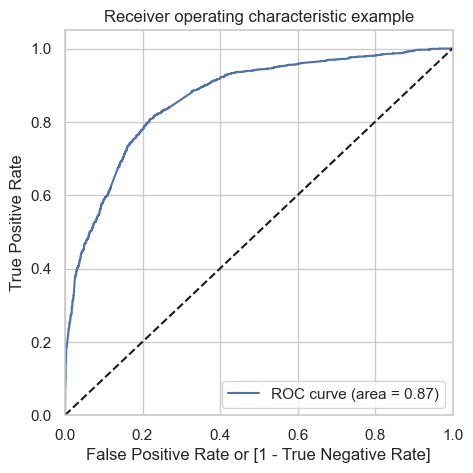

In [100]:
# Calling the ROC function

draw_roc(T2_train_pred_final.Converted, T2_train_pred_final.Conversion_Prob)

In [102]:
#The area under the curve of the ROC is 0.87 which is quite good. So we seem to have a good model
#Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [103]:
# Let's create columns with different probability cutoffs 

num = [float(x)/10 for x in range(10)]
for i in num:
    T2_train_pred_final[i]= T2_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
T2_train_pred_final.head()


,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.287917,0,1,1,1,0,0,0,0,0,0,0
1,0,0.148122,0,1,1,0,0,0,0,0,0,0,0
2,1,0.132538,0,1,1,0,0,0,0,0,0,0,0
3,1,0.341897,0,1,1,1,1,0,0,0,0,0,0
4,1,0.950692,1,1,1,1,1,1,1,1,1,1,1


In [104]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at 
# different values of probabiity cutoffs

c_off_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(T2_train_pred_final.Converted, T2_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    c_off_df.loc[i] =[ i ,accuracy,sensi,speci]
print(c_off_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.481731  1.000000  0.000000
0.1   0.1  0.531047  0.993485  0.101211
0.2   0.2  0.717328  0.941368  0.509083
0.3   0.3  0.761937  0.901815  0.631920
0.4   0.4  0.792199  0.807352  0.778114
0.5   0.5  0.788388  0.743136  0.830450
0.6   0.6  0.771800  0.674267  0.862457
0.7   0.7  0.736606  0.546301  0.913495
0.8   0.8  0.712845  0.456491  0.951125
0.9   0.9  0.645819  0.283388  0.982699


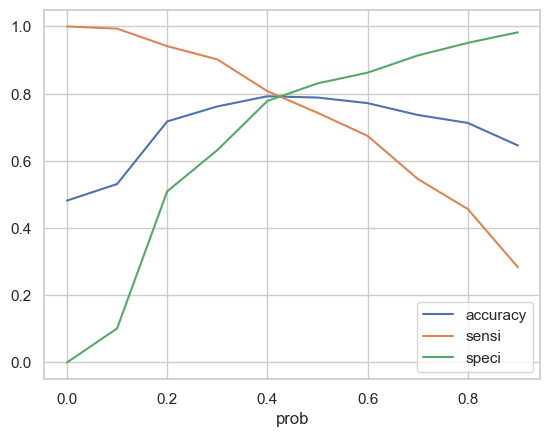

In [106]:
c_off_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [108]:
#0.42 as our cutoff now

T2_train_pred_final['final_predicted'] = T2_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.42 else 0)

T2_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.287917,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.148122,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.132538,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.341897,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.950692,1,1,1,1,1,1,1,1,1,1,1,1


In [109]:
# Let's checking the `accuracy` now

metrics.accuracy_score(T2_train_pred_final.Converted, T2_train_pred_final.final_predicted)

0.791974893521632

In [110]:
# Let's create the confusion matrix once again

con2 = metrics.confusion_matrix(T2_train_pred_final.Converted, T2_train_pred_final.final_predicted )
con2

array([[1827,  485],
       [ 443, 1706]], dtype=int64)

In [112]:
# Let's evaluate the other metrics as well

TP = con2[1,1] # true positive 
TN = con2[0,0] # true negatives
FP = con2[0,1] # false positives
FN = con2[1,0] # false negatives


In [113]:
# Calculating the 'Sensitivity'

TP/(TP+FN)


0.7938576081898557

In [114]:
# Calculating the 'Specificity'

TN/(TN+FP)

0.7902249134948097

# Making Predictions on the Test Set

In [115]:
# Scale the test set as well using just 'transform'

T1_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(T1_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [120]:
# Selecting the columns in T1_train for T1_test as well

T1_test = T1_test[vcol]
T1_test.head()

,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable,"Specialization_Banking, Investment And Insurance"
4771,0.000000,0.000000,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
6122,0.027888,0.029049,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9202,0.015936,0.416813,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
6570,0.011952,0.378961,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
2668,0.031873,0.395246,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [121]:
# Adding a constant to T1_test

T1_test_sm = sm.add_constant(T1_test[vcol])

In [122]:
# Checking T1_test_sm

T1_test_sm

,const,TotalVisits,Total Time Spent on Website,Lead Origin_Lead Add Form,Lead Source_Olark Chat,Lead Source_Welingak Website,Do Not Email_Yes,Last Activity_Email Bounced,Last Activity_Had a Phone Conversation,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent,What is your current occupation_Housewife,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Bounced,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Unreachable,"Specialization_Banking, Investment And Insurance"
4771,1.0,0.000000,0.000000,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0
6122,1.0,0.027888,0.029049,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
9202,1.0,0.015936,0.416813,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
6570,1.0,0.011952,0.378961,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0
2668,1.0,0.031873,0.395246,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5828,1.0,0.011952,0.027289,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
6583,1.0,0.011952,0.152289,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
5531,1.0,0.055777,0.702025,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3056,1.0,0.011952,0.417694,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0


In [125]:
# Dropping the required columns from X_test as well

T1_test.drop([ 'What is your current occupation_Housewife', 
             'What is your current occupation_Working Professional', 
                     'Last Notable Activity_Had a Phone Conversation'], 1, 
                                inplace = True)

In [126]:
# Make predictions on the test set and store it in the variable 'y_test_pred'

T2_test_pred = res.predict(sm.add_constant(T1_test))

In [127]:
T2_test_pred[:10]

4771    0.995897
6122    0.134642
9202    0.692023
6570    0.306527
2668    0.706901
4233    0.823320
3368    0.716115
9091    0.473739
5972    0.272333
3631    0.776409
dtype: float64

In [128]:
# Converting y_pred to a dataframe

T2_pred_1 = pd.DataFrame(T2_test_pred)

In [129]:
T2_pred_1.head()

,0
4771,0.995897
6122,0.134642
9202,0.692023
6570,0.306527
2668,0.706901


In [130]:
# Converting y_test to dataframe

T2_test_df = pd.DataFrame(T2_test)

In [131]:
# Remove index for both dataframes to append them side by side 

T2_pred_1.reset_index(drop=True, inplace=True)
T2_test_df.reset_index(drop=True, inplace=True)

In [132]:
# Append y_test_df and y_pred_1

T2_pred_final = pd.concat([T2_test_df, T2_pred_1],axis=1)

In [133]:
# Check 'y_pred_final'

T2_pred_final.head()

,Converted,0
0,1,0.995897
1,0,0.134642
2,0,0.692023
3,1,0.306527
4,1,0.706901


In [134]:
# Rename the column 

T2_pred_final= T2_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [135]:
T2_pred_final.head()

,Converted,Conversion_Prob
0,1,0.995897
1,0,0.134642
2,0,0.692023
3,1,0.306527
4,1,0.706901


In [136]:
# Make predictions on the test set using 0.45 as the cutoff

T2_pred_final['final_predicted'] = T2_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.42 else 0)

In [137]:
T2_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.995897,1
1,0,0.134642,0
2,0,0.692023,1
3,1,0.306527,0
4,1,0.706901,1


In [138]:
# Let's check the overall accuracy

metrics.accuracy_score(T2_pred_final['Converted'], T2_pred_final.final_predicted)

0.7803347280334728

In [139]:
con2 = metrics.confusion_matrix(T2_pred_final['Converted'], T2_pred_final.final_predicted )
con2

array([[775, 221],
       [199, 717]], dtype=int64)

In [141]:
TP = con2[1,1] # true positive 
TN = con2[0,0] # true negatives
FP = con2[0,1] # false positives
FN = con2[1,0] # false negatives

In [142]:
# Calculating the 'sensitivity'
TP / float(TP+FN)

0.7827510917030568

In [143]:
# Calculating the 'specificity'
TN / float(TN+FP)

0.7781124497991968

# Precision and recall tradeoff

In [144]:
T2_train_pred_final.Converted, T2_train_pred_final.Predicted

(0       0
 1       0
 2       1
 3       1
 4       1
        ..
 4456    1
 4457    0
 4458    0
 4459    0
 4460    0
 Name: Converted, Length: 4461, dtype: int64,
 0       0
 1       0
 2       0
 3       0
 4       1
        ..
 4456    1
 4457    1
 4458    1
 4459    0
 4460    0
 Name: Predicted, Length: 4461, dtype: int64)

In [145]:
p, r, thresholds = precision_recall_curve(T2_train_pred_final.Converted, T2_train_pred_final.Conversion_Prob)

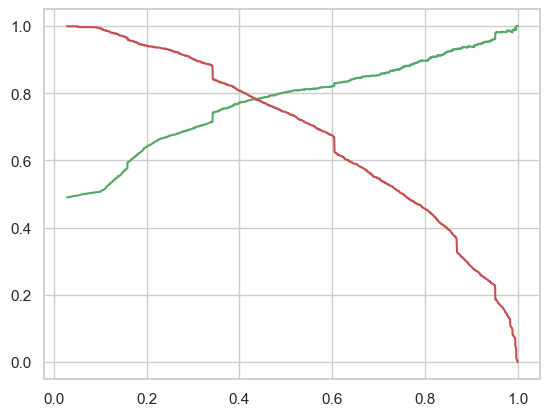

In [146]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [147]:
T2_train_pred_final['final_predicted'] = T2_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

T2_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.287917,0,1,1,1,0,0,0,0,0,0,0,0
1,0,0.148122,0,1,1,0,0,0,0,0,0,0,0,0
2,1,0.132538,0,1,1,0,0,0,0,0,0,0,0,0
3,1,0.341897,0,1,1,1,1,0,0,0,0,0,0,0
4,1,0.950692,1,1,1,1,1,1,1,1,1,1,1,1


In [148]:
# Let's checking the `accuracy` now

metrics.accuracy_score(T2_train_pred_final.Converted, T2_train_pred_final.final_predicted)

0.7901815736381977

In [149]:
# Let's creating the confusion matrix once again

con2 = metrics.confusion_matrix(T2_train_pred_final.Converted, T2_train_pred_final.final_predicted )
con2

array([[1849,  463],
       [ 473, 1676]], dtype=int64)

In [150]:
# Let's evaluate the other metrics as well

TP = con2[1,1] # true positive 
TN = con2[0,0] # true negatives
FP = con2[0,1] # false positives
FN = con2[1,0] # false negatives

In [151]:
#Precision

TP/(TP+FP)

0.7835437120149603

In [152]:
#Recall

TP/(TP+FN)

0.7798976268031642

In [153]:
#This cutoff point seems good to go!

#  Predictions on the Test Set

In [154]:
# Making predictions on the test set and store it in the variable 'T2_test_pred'

T2_test_pred = res.predict(sm.add_constant(T1_test))

In [155]:
T2_test_pred[:10]

4771    0.995897
6122    0.134642
9202    0.692023
6570    0.306527
2668    0.706901
4233    0.823320
3368    0.716115
9091    0.473739
5972    0.272333
3631    0.776409
dtype: float64

In [156]:
# Converting T2_pred to a dataframe

T2_pred_1 = pd.DataFrame(T2_test_pred)

In [157]:
T2_pred_1.head()

,0
4771,0.995897
6122,0.134642
9202,0.692023
6570,0.306527
2668,0.706901


In [158]:
# Converting T2_test to dataframe

T2_test_df = pd.DataFrame(T2_test)

In [159]:
# Removing index for both dataframes to append them side by side 

T2_pred_1.reset_index(drop=True, inplace=True)
T2_test_df.reset_index(drop=True, inplace=True)

In [160]:
# Append T2_test_df and T2_pred_1

T2_pred_final = pd.concat([T2_test_df, T2_pred_1],axis=1)

In [161]:
# Checking the 'y_pred_final'

T2_pred_final.head()

,Converted,0
0,1,0.995897
1,0,0.134642
2,0,0.692023
3,1,0.306527
4,1,0.706901


In [162]:
# Rename the column 

T2_pred_final= T2_pred_final.rename(columns = {0 : 'Conversion_Prob'})

In [163]:
# Let's see the head of T2_pred_final

T2_pred_final.head()

,Converted,Conversion_Prob
0,1,0.995897
1,0,0.134642
2,0,0.692023
3,1,0.306527
4,1,0.706901


In [164]:
# Predictions on the test set using 0.44 as the cutoff

T2_pred_final['final_predicted'] = T2_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.44 else 0)

In [165]:
# Checking y_pred_final

T2_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,1,0.995897,1
1,0,0.134642,0
2,0,0.692023,1
3,1,0.306527,0
4,1,0.706901,1


In [166]:
# Let's checking the overall accuracy

metrics.accuracy_score(T2_pred_final['Converted'], T2_pred_final.final_predicted)

0.7871338912133892

In [167]:
con2 = metrics.confusion_matrix(T2_pred_final['Converted'], T2_pred_final.final_predicted )
con2

array([[797, 199],
       [208, 708]], dtype=int64)

In [168]:
TP = con2[1,1] # true positive 
TN = con2[0,0] # true negatives
FP = con2[0,1] # false positives
FN = con2[1,0] # false negatives

In [169]:
# Calculating the Precision

TP/(TP+FP)

0.7805953693495039

In [170]:
# Calculating Recall

TP/(TP+FN)

0.7729257641921398